
The tutorial includes the following topics:
1. Normal distribution
2. Variance and covariance  
3. Covariance matrix
4. Mahalanobis distance outlier detection



# Normal distribution

 The normal distribution is defined by  the mean $\mu$  and the standard deviation $\sigma$ and  is given by
 
 $$ \mathcal{N}(\mu,\sigma^2)  = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)}$$

The squared standard deviation is called the variance $\sigma^2$. 

Given the mean and variance we can calculate the the probability  of an observation $x$ using the equation of the normal distribution . 

We call this distribution the univariate normal because it consists of only one random normal variable. Three examples of univariate normal distributions with different mean and variance are plotted in the next figure:

In [289]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))


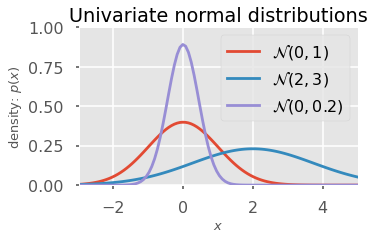

In [290]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-3, 5, num=100)
fig = plt.figure(figsize=(5, 3))
plt.plot(
    x, univariate_normal(x, mean=0, variance=1), 
    label="$\mathcal{N}(0, 1)$")
plt.plot(
    x, univariate_normal(x, mean=2, variance=3), 
    label="$\mathcal{N}(2, 3)$")
plt.plot(
    x, univariate_normal(x, mean=0, variance=0.2), 
    label="$\mathcal{N}(0, 0.2)$")
plt.xlabel('$x$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
plt.title('Univariate normal distributions')
plt.ylim([0, 1])
plt.xlim([-3, 5])
plt.legend(loc=1)
fig.subplots_adjust(bottom=0.15)
plt.show()

## Variance and covariance

We shall take a quick look at the difference between covariance and variance. Variance measures the variation of a single random variable (like the height of a person in a population), whereas covariance is a measure of how much two random variables vary together (like the height of a person and the weight of a person in a population). The formula for variance is given by

$$ \sigma _{x}^{2}= \frac{1}{n-1}\sum_{i=1}^{n} (x_i-\tilde{x})^2$$

Where $n$ is the number of samples (e.g. the number of people) and $\tilde{x}$ is the mean of the random variable (represented as a vector). The covariance $\sigma (x,y)$ of two random variables and is given by 

$$ \sigma (x,y)= \frac{1}{n-1}\sum_{i=1}^{n} (x_i-\tilde{x})(y_i-\tilde{y})$$


## Covariance matrix
With the covariance we can calculate entries of the covariance matrix, which is a square matrix given by $C_{i,j}=\sigma (x_i,x_j)$ where $C \in \mathbb{R}^{d,d}$ and $d$ **describes the dimension or number of random variables of the data (e.g. the number of features like height, width, weight, …). Also, the covariance matrix is symmetric since $\sigma (x_i,x_j)=\sigma (x_j,x_i)$. The diagonal entries of the covariance matrix are the variances and the other entries are the covariances. The entries for the covariance matrix is given by

$$ C= \frac{1}{n-1}\sum_{i=1}^{n} (X_i-\tilde{X})(X_i-\tilde{X})^T$$

Where the dataset is expressed by the matrix $X \in \mathbb{R}^{n,d}$. This tutoria focuses  on the two-dimensional data but can easily be generalized to higher dimensions. The two dimendionsl covariance matrix is given by 
$$C=\begin{bmatrix} \sigma (x,x) & \sigma (x,y)  \\ \sigma (y,x) & \sigma (y,y) \end{bmatrix} $$

The following example shows how linear transformations affect the dataset and corrsponding covariance matrix. First we will generate random points with mean values $\tilde{x}$, $\tilde{y}$ at the origin and unit variance $\sigma_{x}^{2}=\sigma_{y}^{2}=1$ which is also called white noise and has the identity matrix as the covariance matrix.

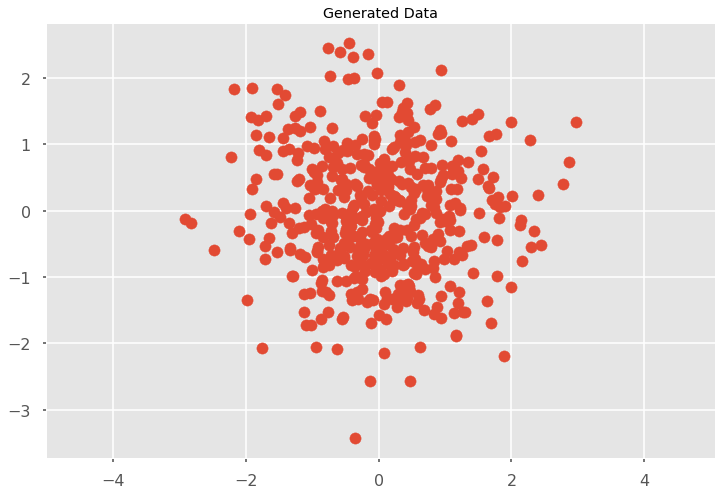

In [291]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data')
plt.axis('equal');

The plot shows that  $x$ and $y$ are uncorrelated (no linear dependence but not necessarily independet) and the covariance matrix $C$ is 

$$C=\begin{bmatrix} \sigma_{x}^2 & 0  \\ 0 & \sigma_{y}^2 \end{bmatrix} $$

This can be verified in python by calculating the covariance matrix

In [4]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
cov_mat(X.T) # (or with np.cov(X.T))

array([[ 0.94667748, -0.04262941],
       [-0.04262941,  1.01237225]])

Which approximately gives us our expected covariance matrix with variances $\sigma_{x}^{2}=\sigma_{y}^{2}=1$.

## Linear Transformations of the Data Set
 Now we will show how transformations affect our data and the covariance matrix $C$. The data will be transformed using the transformation matrix scales the $x$ and $y$ components independently by scaling factors $s_x$ and $s_y$:

$$S=\begin{bmatrix} s_{x} & 0  \\ 0 & s_{y}^2 \end{bmatrix} $$

 The covariance matrix $C$ of the transformed dataset gives 

$$C=\begin{bmatrix} (s_{x}\sigma_x)^2 & 0  \\ 0 & (s_{x}\sigma_x)^2 \end{bmatrix} $$



In the following example the data is centralized (zero mean) and scaled by $0.7$ and $3.4$ in the x and y directions. Notice how the covariance change. 


array([[ 0.45703631, -0.12179125],
       [-0.12179125, 10.25913576]])

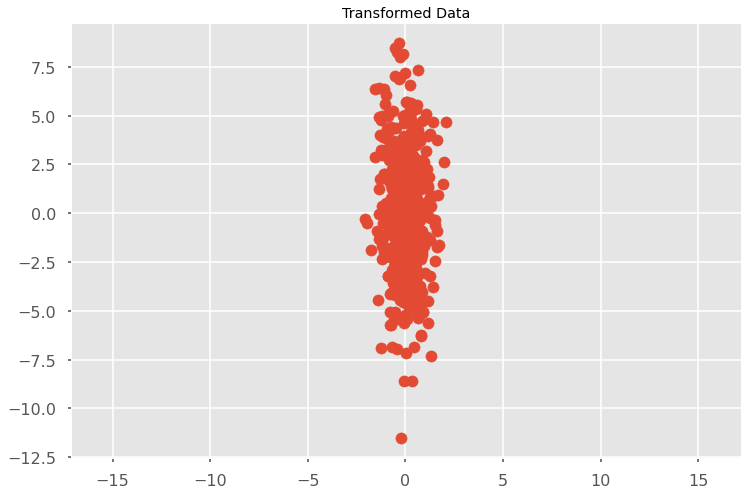

In [292]:
# Center the matrix at the origin
X = X - np.mean(X, 0)

# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Apply scaling matrix to X
Y = X.dot(Scale)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal')

# Calculate covariance matrix
cov_mat(Y.T)

We can see that this does in fact  match our expectation with $0.7^2=0.49$ and $3.4^2=11.56$ for $(s_{x}\sigma_x)^2$ and $(s_{y}\sigma_y)^2$. This relation holds when the data is scaled in $x$ and $y$ direction, but it gets more involved for other linear transformations.
A linear transformation $$ T=RS $$ composed  of a scaling $ S $ and a $R$
where the rotation matrix $R$ with rotation angle $\theta$ is given by
$$ R= \begin{bmatrix} cos(\theta) & -sin(\theta)  \\ sin(\theta) & (cos(\theta) \end{bmatrix}$$

 The transformed data is s found by premultiplying $Y=TX =RSX$  


array([[ 4.86465252, -4.87766797],
       [-4.87766797,  5.85151955]])

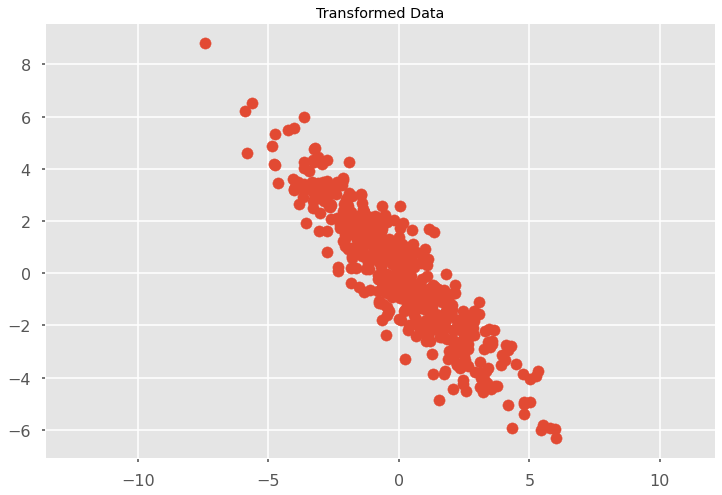

In [293]:
# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Rotation matrix
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# Transformation matrix
T = Scale.dot(Rot)

# Apply transformation matrix to X
Y = X.dot(T)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal');

# Calculate covariance matrix
cov_mat(Y.T)

## Mahalanobis Distance
Mahalanobis Distance (MD) is an effective distance metric that finds the distance between the point and distribution. It works quite effectively on multivariate data because it uses a covariance matrix of variables to find the distance between data points and the center. 
$$ D^2=(X-\tilde{X})^T.C^{-1}.(X-\tilde{X}) $$
This means that Mahalanobis distance detects outliers based on the distribution pattern of data points, unlike the Euclidean distance. Please see figure below to understand the difference.
<img title="figure 1" alt="Alt text" src="img/fig1.jpeg">

As can be seen from Figure 1, data points are scattered in a certain direction. While Euclidean distance can assign some non-outlier points as outliers in such distributions, Mahalanobis distance can keep up with it. This is also the same for the non-linear relations as seen from Figure 2.
<img title="figure 2" alt="Alt text" src="img/fig2.jpeg">


The main reason for this difference is the covariance matrix because covariance indicates how variables variate together. Using covariance while calculating distance between center and points in n-dimensional space provides finding true threshold border based on the variation.




### Mahalanobis Distance Outlier detection 
This part shows the Mahalanobis distance using Python.  The Mahalanobis Distance is given by¨
$$ D^2=(X-\tilde{X})^T.C^{-1}.(X-\tilde{X}) $$
 Only the variables (columns) “Ozone” and “Temp” will be used. The data will remove (clean) any error NA values. Also, We prefer to use the NumPy array instead of using pandas data frame.

In [288]:
# First, we should import the necessary libraries and the dataset.

import pandas as pd
import numpy as np
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

# Import dataset and clean it
df= pd.read_csv('data/air_quality.csv', sep=",", decimal='.' )
df.head()

# Only keep the variables “Ozone” and “Temp” 
df = df[['Ozone', 'Temp']]
df = df.dropna()

#Convert pndas data into numpy 
df = df.to_numpy()

The next step is to obtain the values to calculate the distance between center and points using **MD_calculator** function. These values are the center point and covariance matrix between the “Ozone” and “Temp” variables. Then, we use this values to find the distance between the center point and each observation (point) in the data-set as you can see in the function below.

In [298]:
def MD_calculator(Data):
    #this function get datapoints and calculate the Mahalanobis Distance for each point and also plot the MD for the whole dataset .
    # Covariance matrix
    covariance  = np.cov(Data , rowvar=False)

    # The inverse of covariance 
    covariance_inv = np.linalg.matrix_power(covariance, -1)
    
    # Center point
    centerpoint = np.mean(Data , axis=0)
    distances = []
    for i, val in enumerate(Data):
        p1 = val
        p2 = centerpoint
        distance = (p1-p2).T.dot(covariance_inv).dot(p1-p2)
        distances.append(distance)
    distances = np.array(distances)
    # Plotting the Mahalanobis Distance for all amples 
    #cutoff = chi2.ppf(0.90, df.shape[1])
    plt.scatter(np.arange(len(distances)),distances)
    plt.title('Mahalanobis Distance')
    plt.show()
    return distances


The final step finds the Mahalanobis distance for each observation (point) in the data-set and shows them as a distribution.

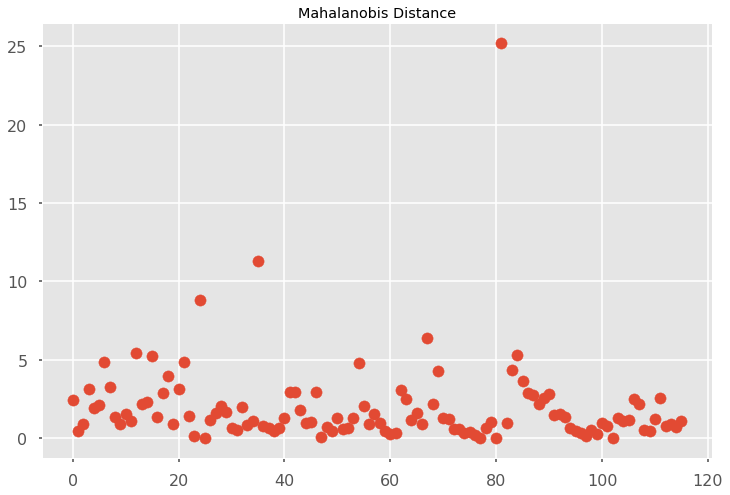

In [299]:
# Distances between center point and 
distances =MD_calculator(df)


Now we can select a cut-off threshold for Mahalanobis Distance so all points with bigger distance than the threshold will be detected as outliers. 
 

In [260]:
#select the cutt-of Threshold

cutoff= 5.5
# Index of outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index of Outliers ----')
print(outlierIndexes)
# array([24, 35, 67, 81])

print('--- Observations found as outlier -----')
print(df[ distances > cutoff , :])

print('--- Percentage of data inculded  -----')
print(1-len(outlierIndexes[0])/len(distances))
# [[115.  79.], [135.  84.], [122.  89.], [168.  81.]]

--- Index of Outliers ----
(array([24, 35, 67, 81]),)
--- Observations found as outlier -----
[[115.  79.]
 [135.  84.]
 [122.  89.]
 [168.  81.]]
--- Percentage of data inculded  -----
0.9655172413793104


In [86]:
def confidence_ellipse(x, y, ax, n_std=2.5, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

Finally, we have four outliers at the index of [24, 35, 67, 81]. Now, let’s create a plot of the covariance confidence ellipse using **confidence_ellipse** to understand this process more clearly.

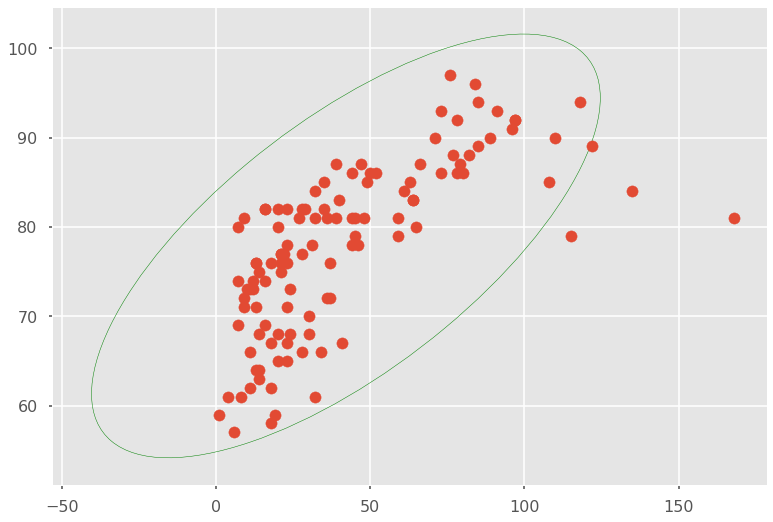

In [87]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

ax = plt.subplot()
confidence_ellipse(df[: , 0], df[ : , 1],ax, edgecolor='green')
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

And here we go, as you can see from figure above, the points stay outside the ellipse detected as an outlier. This ellipse represents the area that wraps non-outlier values according to Mahalanobis distance.